# Functions

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [12]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

# Main

In [13]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)

In [14]:
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210720\\SplitData\\'
# exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210910\\SplitData\\'
ensure_dir(exp_folder+'MI')
ensure_dir(exp_folder+'MI\\Fig')
ensure_dir(exp_folder+'MI\\Fig\\perSpike')

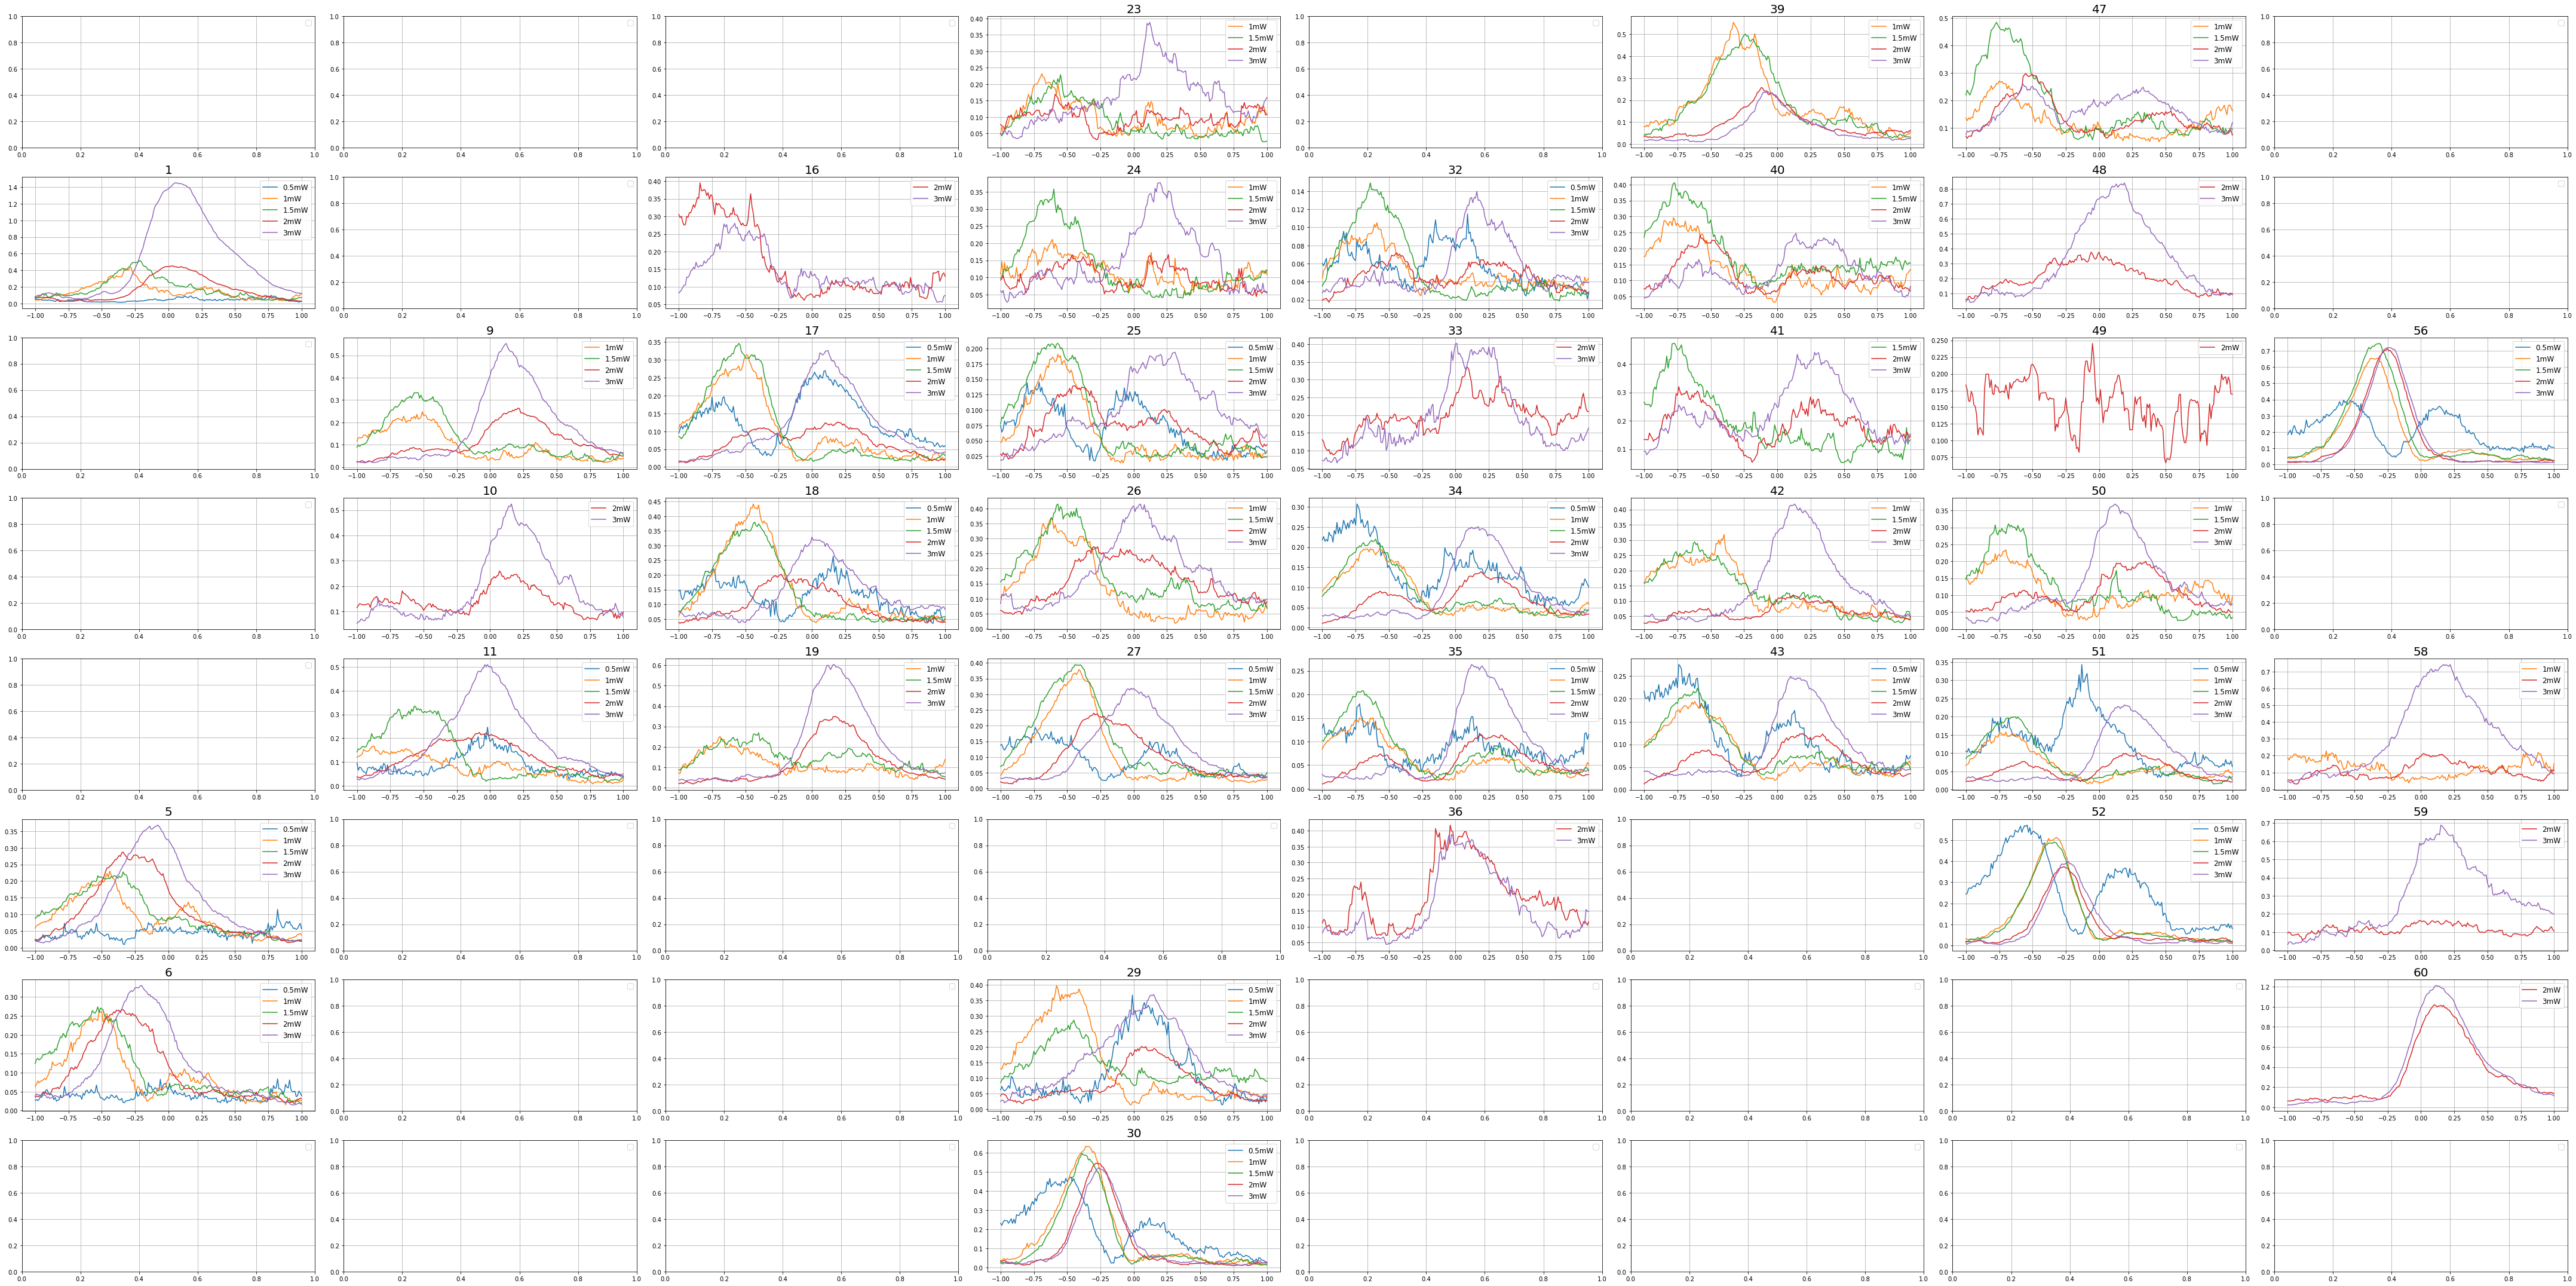

In [15]:
# for Fc in [1, 4]:
MIdFcfig, MIdFcax = plt.subplots(nrows=8, ncols=8)
cmind = 0
Mean = 10
for STD in [0.5,1,1.5,2,3]:
    filename = 'diode_OU_tau=500ms_cutoff=1_mean='+str(Mean)+'_amp='+str(STD)+'_20-Jul-2021_0'
    loadfiles = np.load(exp_folder+'MI\\MIperSpike_'+filename+'.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()[k] = loadfiles[k][()]

    for cn in range(60):
        Information = Information_cell[cn]
        try:
            MIdFcax[np.where(figmap == cn+1)][0].plot(timeshift,Information, label=str(STD)+'mW', color = plt.cm.tab10(cmind))
            MIdFcax[np.where(figmap == cn+1)][0].set_title(str(cn+1), fontsize = 20)
        except:
            continue
#         MIdFcax[np.where(figmap == cn+1)][0].set_xlabel(r'$\delta t$ (s)', fontsize = 16)
#         MIdFcax[np.where(figmap == cn+1)][0].set_ylabel(r'Information (bit/s)', fontsize = 16)
    cmind += 1

for ax1d in MIdFcax:
    for ax in ax1d:
        ax.legend(fontsize = 12)
        ax.grid()
MIdFcfig.set_size_inches(60, 30)
MIdFcfig.tight_layout()
MIdFcfig.savefig(exp_folder+'MI\\Fig\\perSpike\\DCCM_WF_M='+str(Mean)+'_1Hz.tif', bbox_inches = 'tight',pad_inches = 0.3)